# Having a form in a notebook

Forms in a notebook without storing the values in it, animation with pyquickhelper and matplotlib.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### Form

This following trick is inspired from [IPython Notebook: Javascript/Python Bi-directional Communication](https://jakevdp.github.io/blog/2013/06/01/ipython-notebook-javascript-python-communication/). The code is copy pasted below with some modifications. It was implemented in [pyquickhelper](http://www.xavierdupre.fr/app/pyquickhelper/helpsphinx/pyquickhelper/ipythonhelper/html_forms.html?highlight=form#module-pyquickhelper.ipythonhelper.html_forms).

In [2]:
from pyquickhelper.ipythonhelper import open_html_form
params = {"module":"", "version":"v..."}
open_html_form(params, "fill the fields", "form1")

In [3]:
form1

{'module': '', 'version': 'v...'}

With a password:

In [4]:
from pyquickhelper.ipythonhelper import open_html_form
params= {"login":"", "password":""}
open_html_form(params, "credential", "credential")

In [5]:
credential

{'login': '', 'password': ''}

To excecute an instruction when the button *Ok* is clicked:

In [6]:
my_address = None
def custom_action(x):
    x["combined"] = x["first_name"] + " " + x["last_name"]
    return str(x)
from pyquickhelper.ipythonhelper import open_html_form
params = { "first_name":"", "last_name":"" }
open_html_form (params, title="enter your name", key_save="my_address", hook="custom_action(my_address)")

In [7]:
my_address

{'first_name': '', 'last_name': '', 'combined': ' '}

### Animated output

This is not maintained anymore. You should use package [ipywidget](https://ipywidgets.readthedocs.io/en/latest/).

In [8]:
from pyquickhelper.ipythonhelper import StaticInteract, RangeWidget, RadioWidget

In [9]:
def show_fib(N):
    sequence = ""
    a, b = 0, 1
    for i in range(N):
        sequence += "{0} ".format(a)
        a, b = b, a + b
    return sequence

StaticInteract(show_fib,
               N=RangeWidget(1, 100, default=10))

In order to have a fast display, the function ``show_lib`` is called for each possible version. If it is a graph, all possible graphs will be generated.

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig


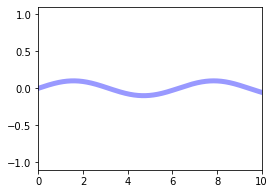
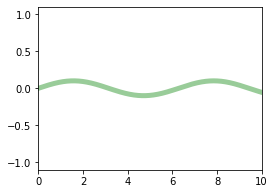
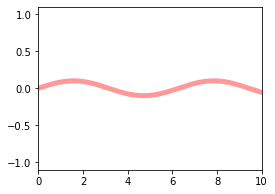
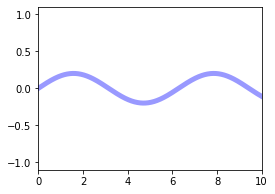
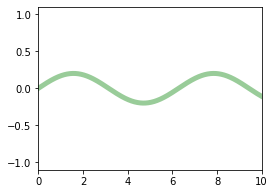
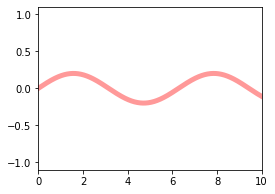
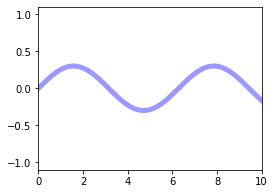
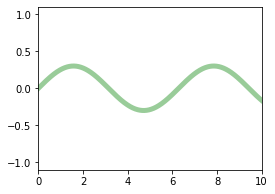
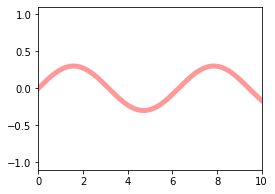
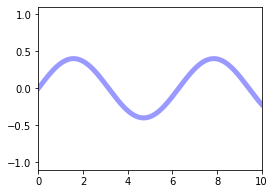
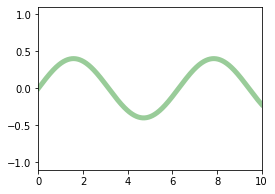
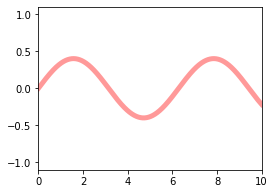
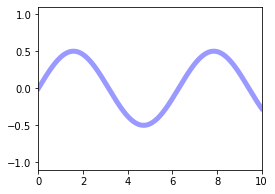
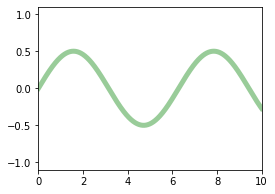
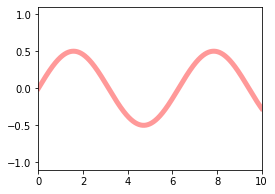

In [11]:
StaticInteract(plot,
               amplitude=RangeWidget(0.1, 0.5, 0.1, default=0.4),
               color=RadioWidget(['blue', 'green', 'red'], default='red'))

### A form with ipywidgets

Not yet ready and the form does not show up in the converted notebook. You need to execute the notebook.

In [12]:
from IPython.display import display
from ipywidgets import Text
last_name = Text(description="Last Name")
first_name = Text(description="First Name")
display(last_name)
display(first_name)

Text(value='', description='Last Name')

Text(value='', description='First Name')

In [13]:
first_name.value, last_name.value

('', '')